# Geolocalización

## Parámetros

In [1]:
BASE_DIR = '/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data' # Mac
# BASE_DIR = r'D:\Users\efras\Documents\EF\Contests\Datathon_CDMX\data' # Windows
ILE_NAME = 'ile_limpio_cluster'
GEO_NAME = 'localidades'

## Importar

### Clases

In [2]:
from mariachis.localidades import GeoLoc

ile_class = GeoLoc(BASE_DIR, ILE_NAME)
geo_class = GeoLoc(BASE_DIR, GEO_NAME, iso_country_code='MX')

### ILE limpio y con cluster

In [3]:
ile = ile_class.full_import(api=False)
ile.sample()

Archivo con nombre ile_limpio_cluster.csv fue encontrado en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data
Con 79383 renglones y 73 columnas


,año,mes,fingreso,autoref,edocivil_descripcion,edad,desc_derechohab,nivel_edu,ocupacion,religion,...,rango_p_diasgesta,rango_fsexual_vs_menarca,rango_edad_vs_menarca,rango_edad_vs_fsexual,antes_vs_despues,antes_vs_despues_detalle,cluster,nombre,conclusión general,características de minorías
60716,2018.0,JULIO,2018-07-12,DESCONOCIDO,CASADX,39.0,ALGUNO,SECUNDARIA,TRAB_HOGAR_NO_REMUNERADX,SI,...,DESCONOCIDO,01 a 03,>= 18,>= 13,DIFERENTE,"antes: DIU, después: DESCONOCIDO",C,Madres con gesta avanzada,Trabajadorx del hogar no remuneradx con prepar...,Servicio de cirugía ambulatoria. Procedimiento...


### Localidades por URL

In [4]:
geo = geo_class.get_data()
geo.sample()

Archivo: localidades.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,country_code,postal_code,place_name,state_name,state_code,province_name,province_code,community_name,community_code,lat,lon,accuracy
57674,MX,47948,Fraile de Núñez,Jalisco,14,Ayotlán,016,,,20.4792,-102.3921,3


## Municipios

### Transformación

In [5]:
geo = geo_class.wrangling_geo(geo)
geo.sample()

Archivo: localidades_geoloc.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,group,geometry,country_code,postal_code,place_name,state_name,state_code,province_name,province_code,community_name,community_code,lat,lon,accuracy,area,boundary,centroid,convex_hull,centroid_lat,centroid_lon
563,"Guerrero, Tlapehuala","MULTIPOLYGON (((-100.470 18.216, -100.471 18.2...",MX,40600,Tupatarillo,Guerrero,12,Tlapehuala,067,Tlapehuala,31,18.2803,-100.4533,4,0.047131,"MULTILINESTRING ((-100.470 18.216, -100.471 18...",POINT (-100.474 18.305),"POLYGON ((-100.526 18.176, -100.531 18.176, -1...",-100.474162,18.304846


### Mapa

<AxesSubplot:>

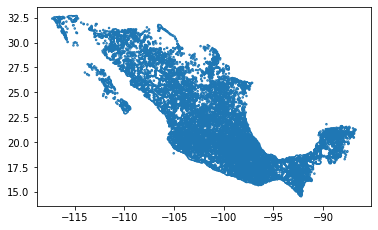

In [6]:
geo['boundary'].plot()

## Unión

In [7]:
df = ile_class.merge_with_ile(ile, geo)
print(df.shape)
df.sample()

Archivo: ile_limpio_cluster_geoloc.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data
(68442, 95)


,index,año,mes,fingreso,autoref,edocivil_descripcion,edad,desc_derechohab,nivel_edu,ocupacion,...,community_code,lat,lon,accuracy,area,boundary,centroid,convex_hull,centroid_lat,centroid_lon
45158,14312,2020.0,AGOSTO,2020-08-27,DESCONOCIDO,UNION_LIBRE,31.0,ALGUNO,PREPARATORIA,EMPLEADX,...,09,19.3874,-99.1213,3,0.074908,"MULTILINESTRING ((-99.206 19.334, -99.209 19.3...",POINT (-99.114 19.347),"POLYGON ((-99.135 19.138, -99.140 19.139, -99....",-99.114401,19.346515


## Clustering de localidades

In [8]:
df, loc_cluster = ile_class.loc_cluster(ile)
df.sample()

Archivo: ile_limpio_cluster_group.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,,1er Interrupción Legal del Embarazo (ILE) de personas con educación superior,Atención directa en servicio Gineco-Obstetricia (GO),Educación restringida e Inicio de Vida Sexual Activa (IVSA) temprana,Estudiantes de nivel media-superior y superior con decisión de Anticonceptivos Reversibles de Larga Duración (ARLD) post-ILE,Jóvenes de 22-25 desempleadas con decisión de ILE en año de pandemia,Jóvenes de preparatoria con decisión de ILE en su primer gesta,Madres con gesta avanzada,Madres maduras con pareja en unión libre,Madres maduras foráneas con menarca temprana,Trabajadoras del hogar no remuneradas sin hijos,cluster
entidad,alc_o_municipio,,,,,,,,,,,
ESTADO DE MEXICO,VALLE DE CHALCO,0.146296,0.040741,0.148148,0.124074,0.138889,0.085185,0.088889,0.057407,0.053704,0.116667,B


## Preservación del modelo

In [9]:
ile_class.save_model({'pronostico':loc_cluster, 'pronostico_cols':df.columns}, 'ile_modelo_localidad_clustering')

El modelo ile_modelo_localidad_clustering.xz fue guardado existosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data
